<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-34/blob/main/Acitividad_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombres : Katherine Vanegas Salamanca - David Andrés González Medina

Matricula : A01794113 - A01794025

Materia: Ciencia de Datos

Profesor: Jobish Vallikavungal Devassia / Roberto Antonio Guevara González

Actividad: Actividad Semanal -- 4 (PCA)

**Parte 1: Ejercicio guiado **

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos.

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.


Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [78]:
# Se importan las librerías requeridas

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [79]:
# En está sección se llama la Base de Datos a utilizar mediante la variable path. Luego se crea el DataFrame y se imprime las 5 primeras líneas.

path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

df = pd.read_csv(path, index_col=0)
df.index.name = None
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [80]:
# Aquí se revisan la cantidad de datos nulos por variable para realizar el proceso de limpieza de datos.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [81]:
# Se eliminan las columnas cuyos datos son variables categóricas. Luego se eliminan las filas 
# que tienen datos faltantes los cuales no son representativos respecto al tamaño de la muestra.

df1 = df.drop(['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y'], axis = 1)
df1.dropna(inplace = True)
print(df1.isna().values.any())

df1


False


,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [82]:
# Se realiza el proceso de Normalización de Puntuación Z (Estandarización)

scaler = StandardScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df1_scaled.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137171,-1.246018,-0.642621,-0.647502,-0.668106,-0.672592,-0.663184,-0.652856,-0.341883,-0.227134,-0.296787,-0.308091,-0.314115,-0.293458
1,-0.366343,-1.028971,-0.659333,-0.666842,-0.639377,-0.621748,-0.606374,-0.598118,-0.341883,-0.213642,-0.240012,-0.244285,-0.314115,-0.181003
2,-0.597591,-0.160781,-0.298805,-0.494058,-0.482587,-0.449902,-0.417397,-0.391856,-0.250245,-0.191951,-0.240012,-0.244285,-0.248680,-0.012322
3,-0.905922,0.164790,-0.057825,-0.013626,0.032485,-0.232620,-0.187017,-0.156891,-0.221148,-0.169435,-0.228657,-0.237905,-0.244165,-0.237230
4,-0.905922,2.335264,-0.578761,-0.611434,-0.161481,-0.347204,-0.348370,-0.331730,-0.221148,1.334291,0.270964,0.266157,-0.269030,-0.255279


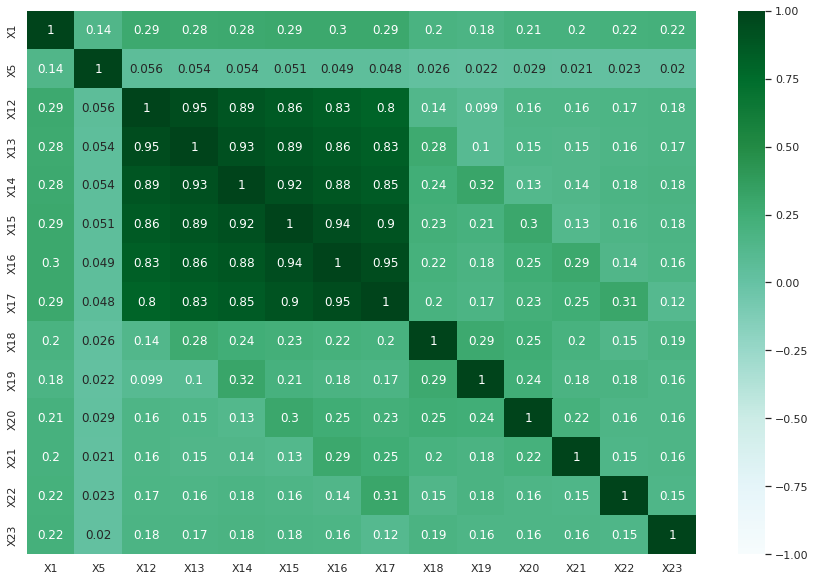

In [83]:
# Generamos la matriz de correlación para distinguir las variables que, luego de su escalamiento, poseen un alto grado de correlación
# entre sí.

corr = df1_scaled.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

In [84]:
# Se utiliza el método de Principal Components Analysis para la reducción de la dimensionalidad de los datos.

pcs = PCA()
pcs = pcs.fit(df1_scaled)
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.432904,0.422773,0.422773
1,1.309933,0.122562,0.545335
2,1.022276,0.074644,0.619979
3,0.961860,0.066082,0.686061
4,0.940077,0.063123,0.749183
5,0.934233,0.062340,0.811523
6,0.882978,0.055687,0.867211
7,0.852435,0.051902,0.919112
8,0.841052,0.050525,0.969637
9,0.514248,0.018889,0.988526


In [85]:
# Se transpone la matriz de componentes para una mejor visualización y detectar la varianza que aporta cada componente 
# y su respectivo acumulado para explicar la variabilidad de los datos.

pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.2,0.16,0.15
Proportion of variance,0.42,0.12,0.07,0.07,0.06,0.06,0.06,0.05,0.05,0.02,0.01,0.0,0.00,0.00
Cumulative proportion,0.42,0.55,0.62,0.69,0.75,0.81,0.87,0.92,0.97,0.99,0.99,1.0,1.00,1.00


In [86]:
# Nombrar las columnas con el respectivo identificador de datos PCA.

pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary.columns,
                                index = df1_scaled.columns
                                )
pcsComponents_dfX

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
X1,0.165467,0.300798,-0.378586,-0.200022,0.035284,-0.078832,0.111146,-0.045317,-0.822064,-0.029196,-0.006209,0.015716,-0.000433,0.003341
X5,0.032784,0.072029,-0.869404,0.339083,-0.039855,0.071416,-0.078753,0.027019,0.330440,-0.009048,0.000116,-0.001378,0.000130,0.001064
X12,0.372452,-0.190762,-0.034274,-0.063879,0.041402,-0.043998,0.008159,0.009324,0.010344,0.566708,0.416051,-0.432955,-0.183768,-0.316617
X13,0.383257,-0.174623,-0.001873,0.007655,0.083170,-0.028834,-0.032455,-0.135649,0.016687,0.386872,0.038433,0.345026,0.329408,0.645273
X14,0.388267,-0.126883,0.034734,0.060535,0.113784,0.099222,-0.121170,0.093106,-0.018471,0.122876,-0.484809,0.495788,-0.086406,-0.527622
X15,0.391561,-0.120407,0.034078,0.074763,0.028364,0.014530,0.126488,0.039127,0.019116,-0.205237,-0.523202,-0.489705,-0.362078,0.346043
X16,0.388508,-0.105928,0.033881,0.039521,-0.106745,-0.099292,-0.007572,0.049746,0.023727,-0.420006,0.068410,-0.249473,0.718405,-0.226614
X17,0.380675,-0.094168,0.018478,-0.070638,-0.164967,0.069259,0.007893,-0.000365,0.058690,-0.488868,0.513263,0.338708,-0.427776,0.072267
X18,0.135111,0.383181,0.173883,0.362104,0.225630,0.040580,-0.201663,-0.748696,0.019024,-0.056590,0.047511,-0.069350,-0.044832,-0.084571
X19,0.116760,0.408370,0.201028,0.345707,0.148667,0.408358,-0.278849,0.578661,-0.109896,0.050841,0.147310,-0.068844,0.038906,0.124888


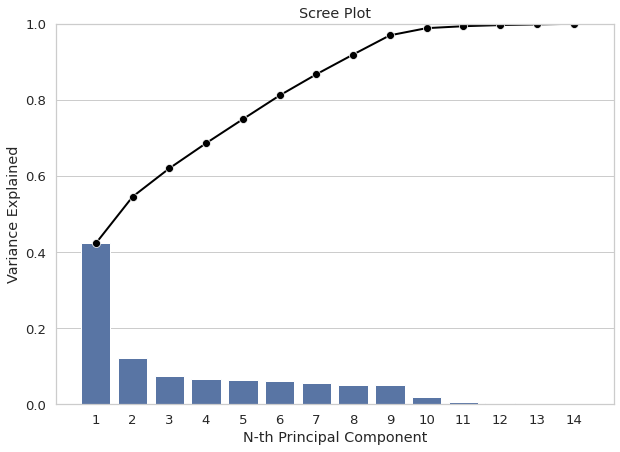

In [87]:
# Se grafica el Screen Plot para observar el comportamiento de los componentes.

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
_.set(xlabel='N-th Principal Component', ylabel = 'Variance Explained')
plt.ylim(0, 1)
plt.show()

In [88]:
# Aquí nuevamente se muestran los componentes con la etiquetad del respectivo PCA.

pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8411,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [89]:
# Se muestra la matriz del mínimo de componentes que explican la mayor variabilidad. 

pcsCompsDf = pd.DataFrame(pcs.components_.transpose(), columns= pcsSummary.columns, index=df1_scaled.columns)
pcsCompsDf.iloc[:, :7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,0.165467,0.300798,-0.378586,-0.200022,0.035284,-0.078832,0.111146
X5,0.032784,0.072029,-0.869404,0.339083,-0.039855,0.071416,-0.078753
X12,0.372452,-0.190762,-0.034274,-0.063879,0.041402,-0.043998,0.008159
X13,0.383257,-0.174623,-0.001873,0.007655,0.083170,-0.028834,-0.032455
X14,0.388267,-0.126883,0.034734,0.060535,0.113784,0.099222,-0.121170
X15,0.391561,-0.120407,0.034078,0.074763,0.028364,0.014530,0.126488
X16,0.388508,-0.105928,0.033881,0.039521,-0.106745,-0.099292,-0.007572
X17,0.380675,-0.094168,0.018478,-0.070638,-0.164967,0.069259,0.007893
X18,0.135111,0.383181,0.173883,0.362104,0.225630,0.040580,-0.201663
X19,0.116760,0.408370,0.201028,0.345707,0.148667,0.408358,-0.278849


**Paso 2: Magnitud y Dirección de lo coeficientes de las variables originales **

In [90]:
# Se determinan qué variables son las que explican los principales componentes 1, 2 y 3 con sus respectivas magnitudes.

pcsCompsDf.PC1.abs().nlargest(3)

X15    0.391561
X16    0.388508
X14    0.388267
Name: PC1, dtype: float64

In [91]:
pcsCompsDf.PC2.abs().nlargest(3)

X19    0.408370
X20    0.392302
X18    0.383181
Name: PC2, dtype: float64

In [92]:
pcsCompsDf.PC3.abs().nsmallest(3)

X13    0.001873
X17    0.018478
X16    0.033881
Name: PC3, dtype: float64

In [93]:
# Finalmente, se muestra la varianza acumulada objetivo con el mínimo de componentes.

pcsSummary.iloc[2,6]

0.8672109126388899

Luego de realizar el procesamiento de los datos mediante la normalización de sus componentes, se ha determinado que, para el modelo se requieren 7 componentes principales los cuales cubren el 86% de la variabilidad total. Como se observa en la gráfica que las 2 primeras variables explican apenas el 52% de la variabilidad; por ende, tomar una cantidad baja de variables implica una péridad en la información obtenida.

**Paso 3: Identificación de valores atípicos **

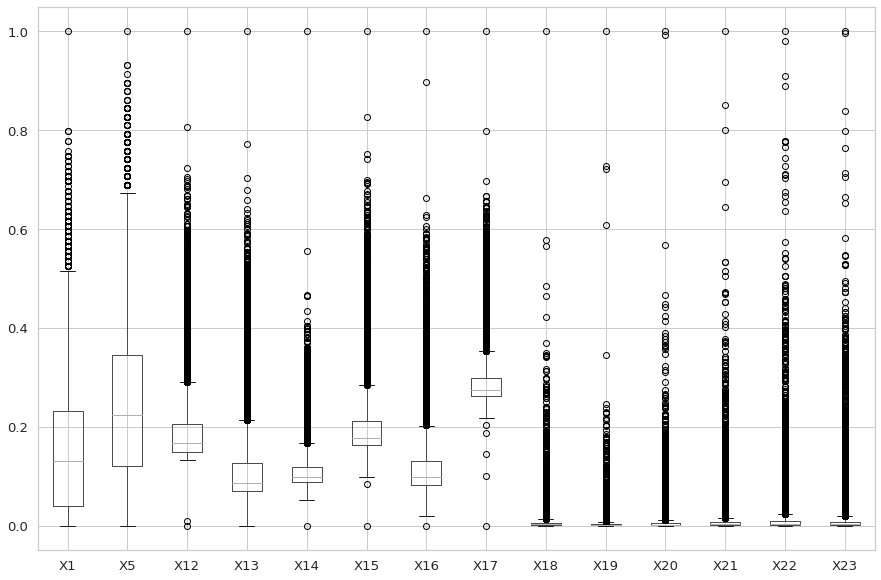

In [94]:
# Graficamos el Boxplot para identificar loas valores atípicos (outliers). Se puede observar que las variables
# X1 y X5 presentan la menor de concentración de valores atípocs respecto a las demás variables.

minmax = MinMaxScaler()

pd.DataFrame(minmax.fit_transform(df1), columns = df1.columns).boxplot()

**Parte 2: Responder preguntas **

Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?

Para éste caso, se requieren tomar 7 componentes mínimos dado que, al momento de calcular la respectiva variabilidad total, la suma de cada aportación le permite llegar al modelo a un valor de 86% de dicha medida. Es decir se reduciría los datos de 14 variables a 7 componentes.

¿Cuál es la variación de los datos que representan esos componentes?

Como anteriormente se mencionó la variación que representan los componentes utilizados corresponde al 86% de la variabilidad.

¿Cuál es la pérdida de información después de realizar PCA?

La pérdida de información obtenida luego de realizar el PCA es de 14% aproximadamente.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Dentro del análisis realizado para los 3 primeros componentes principales, detectamos que la variable con mayor importancia es la X15 y la variable con menor importancia es la X13.

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Cuando se tiene una base de datos con muchas variables es posible analizar cuales nos aportan más informacion y cuales no aportan informacion tan valiosa. Es posible que el modelo demande bastantes recursos al tener que procesar una data con demasiada información, por lo que el PCA optimiza dicho proceso. Uno de los beneficios mas importantes es la identificación de las variables menos relevantes, las cuales se pueden descartar y asi reducir la dimensionalidad de los datos sin perder información importante, agilizando el proceso de modelado y permitiendo que el modelo procese mejor los datos.